In [1]:
import pandas as pd
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df = pd.read_csv(train_file)

In [2]:
import pandas as pd

# Example class distribution (replace with your actual dataset)
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)


df = pd.DataFrame(df_train)

print("Class distribution before undersampling:")
print(df['label'].value_counts())

Class distribution before undersampling:
label
nh    15116
h      6920
Name: count, dtype: int64


In [3]:
def perform_undersampling(df, target_column, ratio=1.0, random_state=42):
    # Identify minority and majority classes
    minority_class = df[df[target_column] == 'h']
    majority_class = df[df[target_column] == 'nh']

    # Determine the number of samples to keep from majority class
    n_minority = len(minority_class)
    n_majority_to_keep = int(n_minority * ratio)

    # Undersample majority class randomly
    majority_sampled = majority_class.sample(n=n_majority_to_keep, random_state=random_state)

    # Combine minority class and sampled majority class
    undersampled_df = pd.concat([minority_class, majority_sampled])

    # Shuffle the dataset
    undersampled_df = undersampled_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return undersampled_df

# Assuming 'label' is the name of the target column in your dataset
target_column = 'label'

# Perform undersampling
df_resampled = perform_undersampling(df, target_column)

# Print class distribution after undersampling
print("\nClass distribution after undersampling:")
print(df_resampled[target_column].value_counts())


Class distribution after undersampling:
label
nh    6920
h     6920
Name: count, dtype: int64


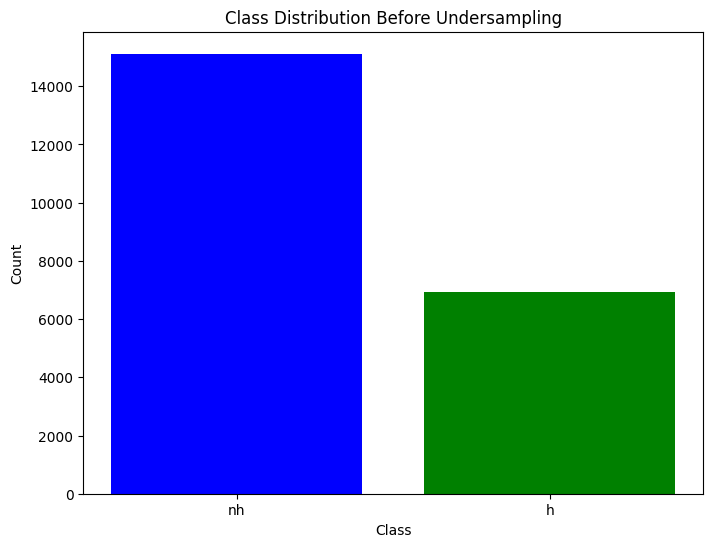


Class distribution after undersampling:
label
nh    6920
h     6920
Name: count, dtype: int64


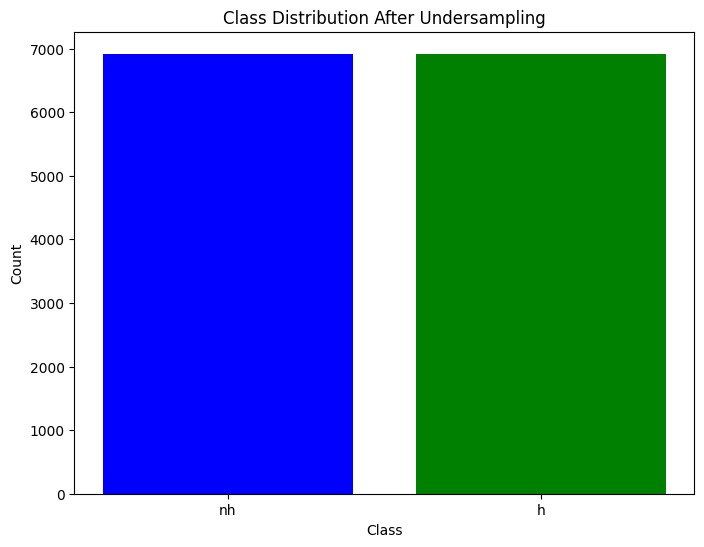

In [4]:
import matplotlib.pyplot as plt
# Plot class distribution before undersampling
plt.figure(figsize=(8, 6))
plt.bar(df[target_column].value_counts().index, df[target_column].value_counts().values, color=['blue', 'green'])
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perform undersampling
df_resampled = perform_undersampling(df, target_column)

# Print class distribution after undersampling
print("\nClass distribution after undersampling:")
print(df_resampled[target_column].value_counts())

# Plot class distribution after undersampling
plt.figure(figsize=(8, 6))
plt.bar(df_resampled[target_column].value_counts().index, df_resampled[target_column].value_counts().values, color=['blue', 'green'])
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [5]:
import pandas as pd

# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

df = pd.DataFrame(df_train)

print("Class distribution before oversampling:")
print(df['label'].value_counts())

Class distribution before oversampling:
label
nh    15116
h      6920
Name: count, dtype: int64


In [6]:
def perform_oversampling(df, target_column, ratio=1.0, random_state=42):
    # Identify minority and majority classes
    minority_class = df[df[target_column] == 'h']
    majority_class = df[df[target_column] == 'nh']

    # Determine the number of samples to add to minority class
    n_majority = len(majority_class)
    n_minority_to_add = int(n_majority * ratio) - len(minority_class)

    # Oversample minority class with replacement
    minority_sampled = minority_class.sample(n=n_minority_to_add, replace=True, random_state=random_state)

    # Combine minority class and original majority class
    oversampled_df = pd.concat([majority_class, minority_sampled, minority_class])

    # Shuffle the dataset
    oversampled_df = oversampled_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    return oversampled_df

# Assuming 'label' is the name of the target column in your dataset
target_column = 'label'

# Perform oversampling
df_resampled = perform_oversampling(df, target_column)

# Print class distribution after oversampling
print("\nClass distribution after oversampling:")
print(df_resampled[target_column].value_counts())



Class distribution after oversampling:
label
nh    15116
h     15116
Name: count, dtype: int64



Class distribution after oversampling:
label
nh    15116
h     15116
Name: count, dtype: int64


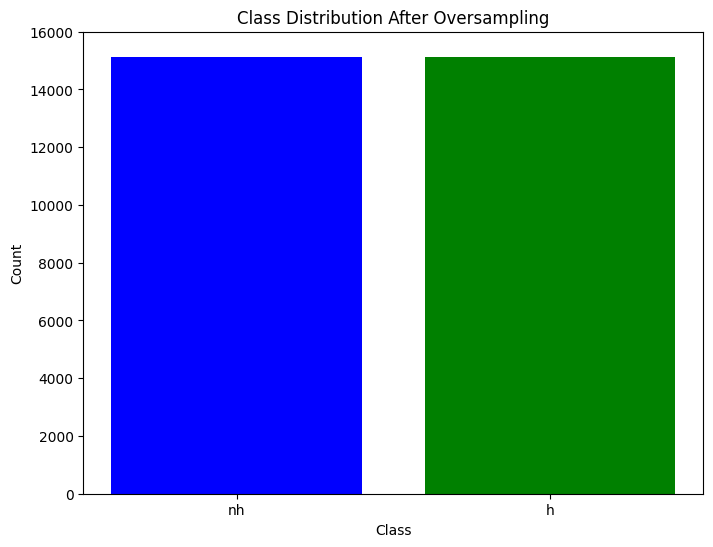

In [7]:
import matplotlib.pyplot as plt

# Perform oversampling
df_resampled = perform_oversampling(df, target_column)

# Print class distribution after oversampling
print("\nClass distribution after oversampling:")
print(df_resampled[target_column].value_counts())

# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
plt.bar(df_resampled[target_column].value_counts().index, df_resampled[target_column].value_counts().values, color=['blue', 'green'])
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.ylim(0, 16000)
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Step 1: Load the dataset
# For this example, we assume the dataset is a CSV file
# Change the file path as needed
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)



In [18]:
# Step 2: Preprocess the data
# Identify numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns


In [19]:
# Separate features and target
X = df_train.drop('label', axis=1)
y = df_train['label']

# Encode categorical features
for col in categorical_cols:
    if col != 'label':  # Ensure we do not encode the target column if it's categorical
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))


In [20]:
# Standardize numerical features (optional)
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Step 4: Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  66 1345]
 [  54 2943]]

Classification Report:
              precision    recall  f1-score   support

           h       0.55      0.05      0.09      1411
          nh       0.69      0.98      0.81      2997

    accuracy                           0.68      4408
   macro avg       0.62      0.51      0.45      4408
weighted avg       0.64      0.68      0.58      4408


Accuracy Score:
0.6826225045372051


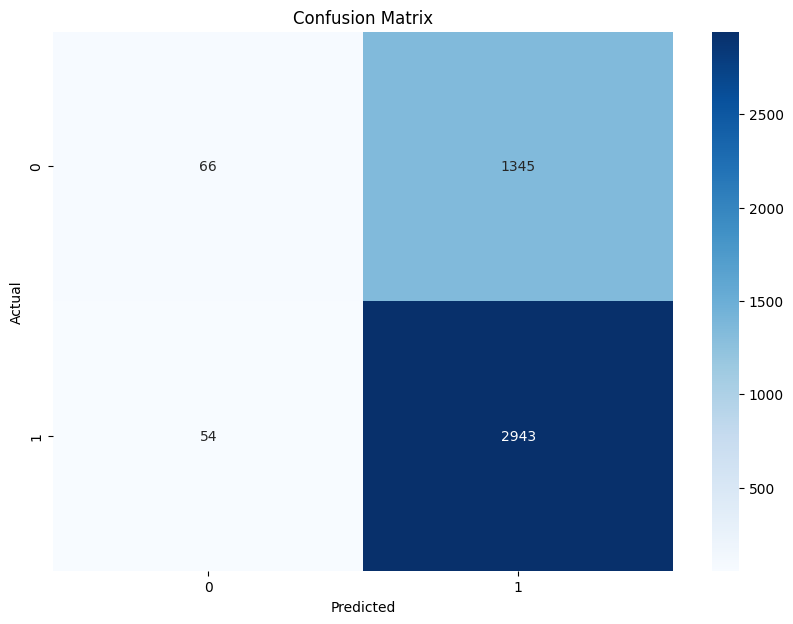

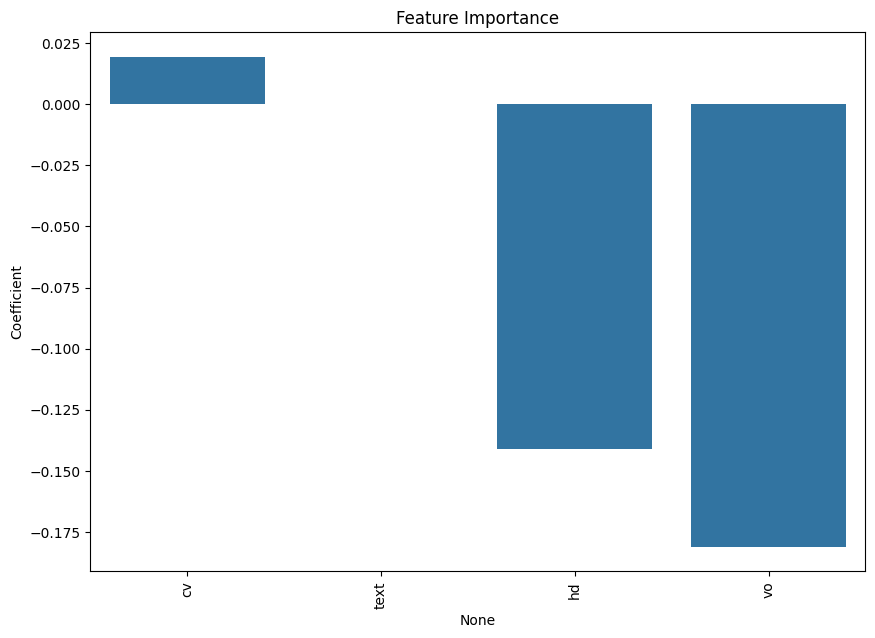

In [22]:
# Step 6: Visualize the results
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance (coefficients)
coefficients = pd.DataFrame(model.coef_.T, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

NAIVE BAYES

In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [26]:
# Step 1: Load the dataset
# For this example, we assume the dataset is a CSV file
# Change the file path as needed
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [28]:
# Convert 'label' column values from 'h' and 'nh' to 1 and 0
label_mapping = {'h': 1, 'nh': 0}
df['label'] = df['label'].map(label_mapping)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']